# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./traffic-signs-data/train.p"
validation_file="./traffic-signs-data/valid.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

#print (X_train)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42}


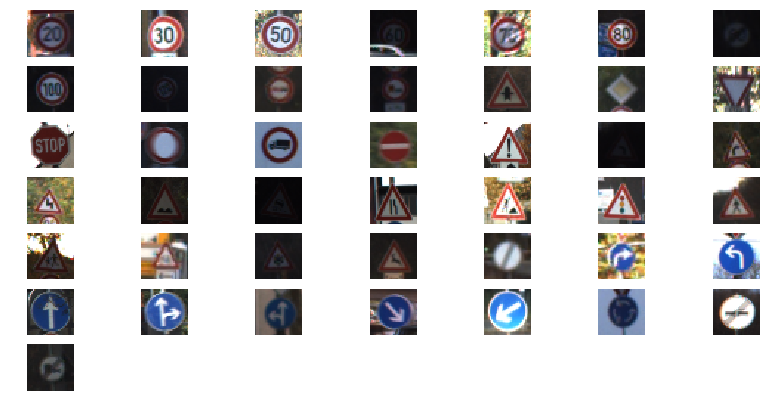

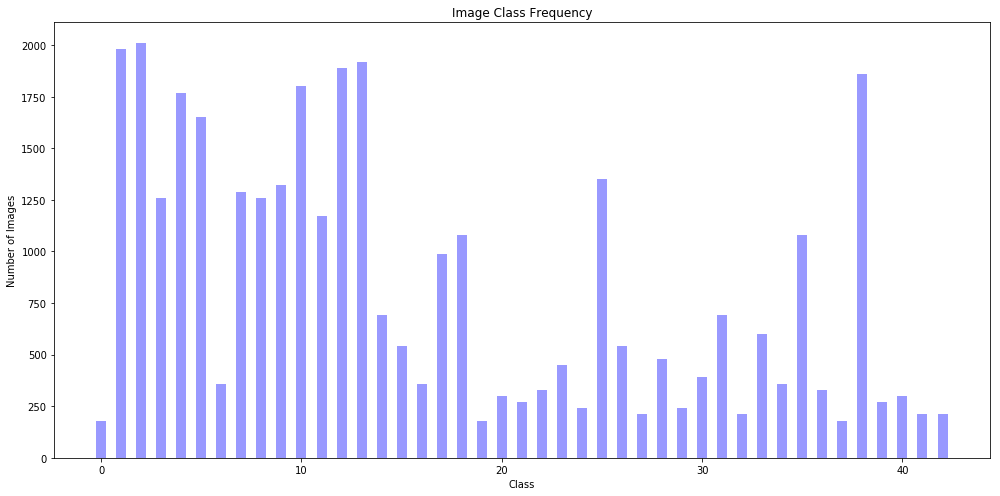

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import collections
import random
# Visualizations will be shown in the notebook.
%matplotlib inline
classes=set(y_train)
print(classes)
import pylab


def plot_labels_count(data):
    
    
    counter=collections.Counter(data)
    
    labels_frequency = [x[1] for x in sorted(counter.most_common())]
    n_groups = len(labels_frequency)
    
    fig, ax = plt.subplots()

    index = np.arange(n_groups)
    bar_width = 0.5
    opacity = 0.4

    rects1 = plt.bar(index, labels_frequency, bar_width,
                     alpha=opacity,
                     color='b')

    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title('Image Class Frequency')

    plt.tight_layout()
    plt.show()


pylab.rcParams['figure.figsize'] = (14, 7)

label_type=[]
for i  in  range(0,n_classes):
    plt.subplot(7,7,i+1)
    label_type.append(X_test[np.where( y_test == i )[0][0],:,:,:].squeeze())
    img = plt.imshow(X_test[np.where( y_test == i )[0][0],:,:,:].squeeze())
    plt.axis('off')
    
plot_labels_count(y_train)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
import tensorflow as tf
EPOCHS = 50
BATCH_SIZE = 128
rate = 0.001



In [5]:
#i have chossed to use data normilization as it improved the results
def preprocess(img):
    return (img - 128.) / 128.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

#Xgs_train, ygs_train = shuffle(Xgray_train, y_train)

In [7]:
## Normalize the train and test datasets to (-1,1)
X_train_n = np.array([preprocess(img) for img in X_train])
X_valid_n = np.array([preprocess(img) for img in X_valid])
X_test_n = np.array([preprocess(img) for img in X_test])


print(np.mean(X_train_n))
print(np.mean(X_valid_n))
print(np.mean(X_test_n))

-0.354081335648
-0.347215411128
-0.358215153428


In [8]:
#im tried of modifying the original code ,it s good a idea to change what ever here
XF_train = X_train_n
XF_valid = X_valid_n
XF_test = X_test_n

print (XF_train.shape)

(34799, 32, 32, 3)


### Model Architecture

In [9]:
def Mod_arch(x):
    """Perform a forward pass through the network
    
    Parameters
    ----------
    x : Tensor
        the input data
        
    Returns
    -------
    Tensor
        the logits
        
    """
    # Arguments used for tf.truncated_normal --> used to randomly define the weights and biases
    mu = 0
    sigma = 0.1

    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    w1 = tf.Variable(tf.truncated_normal([5, 5, 3, 6], mean=mu, stddev=sigma))
    b1 = tf.Variable(tf.zeros(6))
    strides = [1, 1, 1, 1]
    padding = 'VALID'
    h1 = tf.nn.conv2d(x, w1, strides, padding) + b1

    # Activation.
    a1 = tf.nn.dropout(tf.nn.relu(h1), keep_prob)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    ksize = [1, 2, 2, 1]
    strides = [1, 2, 2, 1]
    padding = 'SAME'
    a2 = tf.nn.dropout(tf.nn.max_pool(a1, ksize, strides, padding), keep_prob)
    

    # Layer 2: Convolutional. Output = 10x10x16.
    w3 = tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean=mu, stddev=sigma))
    b3 = tf.Variable(tf.zeros(16))
    strides = [1, 1, 1, 1]
    padding = 'VALID'
    h3 = tf.nn.conv2d(a2, w3, strides, padding) + b3

    # Activation.
    a3 = tf.nn.dropout(tf.nn.relu(h3), keep_prob)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    ksize = [1, 2, 2, 1]
    strides = [1, 2, 2, 1]
    padding = 'SAME'
    a4 = tf.nn.dropout(tf.nn.max_pool(a3, ksize, strides, padding), keep_prob)

    #Flatten. Input = 5x5x16. Output = 400.
    a5 = tf.contrib.layers.flatten(a4)

    # Layer 3: Fully Connected. Input = 400. Output = 120.
    w6 = tf.Variable(tf.truncated_normal([400, 120], mean=mu, stddev=sigma))
    b6 = tf.Variable(tf.zeros(120))
    h6 = tf.add(tf.matmul(a5, w6), b6)

    # Activation.
    a6 = tf.nn.dropout(tf.nn.relu(h6), keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    w7 = tf.Variable(tf.truncated_normal([120, 84], mean=mu, stddev=sigma))
    b7 = tf.Variable(tf.zeros(84))
    h7 = tf.add(tf.matmul(a6, w7), b7)

    # Activation.
    a7 = tf.nn.dropout(tf.nn.relu(h7), keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    w8 = tf.Variable(tf.truncated_normal([84, 43], mean=mu, stddev=sigma))
    b8 = tf.Variable(tf.zeros(43))

    return tf.add(tf.matmul(a7, w8), b8)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [10]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

In [11]:

logits = Mod_arch(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [12]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [13]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(XF_train)
    print (XF_train.shape)
    print("Training...")
    print()
    for i in range(EPOCHS):
        XF_train, y_train = shuffle(XF_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = XF_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
            
        validation_accuracy = evaluate(XF_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

(34799, 32, 32, 3)
Training...

EPOCH 1 ...
Validation Accuracy = 0.774

EPOCH 2 ...
Validation Accuracy = 0.846

EPOCH 3 ...
Validation Accuracy = 0.883

EPOCH 4 ...
Validation Accuracy = 0.896

EPOCH 5 ...
Validation Accuracy = 0.900

EPOCH 6 ...
Validation Accuracy = 0.900

EPOCH 7 ...
Validation Accuracy = 0.907

EPOCH 8 ...
Validation Accuracy = 0.916

EPOCH 9 ...
Validation Accuracy = 0.907

EPOCH 10 ...
Validation Accuracy = 0.898

EPOCH 11 ...
Validation Accuracy = 0.918

EPOCH 12 ...
Validation Accuracy = 0.912

EPOCH 13 ...
Validation Accuracy = 0.904

EPOCH 14 ...
Validation Accuracy = 0.913

EPOCH 15 ...
Validation Accuracy = 0.917

EPOCH 16 ...
Validation Accuracy = 0.923

EPOCH 17 ...
Validation Accuracy = 0.929

EPOCH 18 ...
Validation Accuracy = 0.921

EPOCH 19 ...
Validation Accuracy = 0.891

EPOCH 20 ...
Validation Accuracy = 0.932

EPOCH 21 ...
Validation Accuracy = 0.931

EPOCH 22 ...
Validation Accuracy = 0.932

EPOCH 23 ...
Validation Accuracy = 0.927

EPOCH 24 ..

In [14]:
# evaluate the validate set
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    acc = evaluate(XF_valid, y_valid)
    print("accuracy in validation set: {:.3f}".format(acc))

accuracy in validation set: 0.951


In [15]:

# test
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    acc = evaluate(XF_test, y_test)
    print("accuracy in test set: ", acc)

accuracy in test set:  0.931512272179


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

[2.0, 17, 4.0, 11, 27, 28, 17, 14, 17, 12, 14, 33, 14, 18, 33, 38, 13]


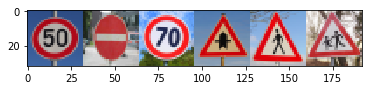

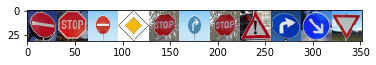

In [41]:
### Load the images and plot them here.
import matplotlib.image as mpimg
import cv2
import os
import ast
# Load new images, all images have been pre-cropped to square images
imgdir = 'test'
X_new_images = []
y_new_images = []

for filename in os.listdir(imgdir):
    if filename.endswith('.jpg'):
        img = mpimg.imread(os.path.join(imgdir, filename))
        img = cv2.resize(img, (32,32), interpolation=cv2.INTER_AREA)
        X_new_images.append(img)
        y_new_images.append(ast.literal_eval(filename[:2]))
print (y_new_images)        
# Plot the new images
vis = np.concatenate(X_new_images[0:6], axis=1)
plt.imshow(vis)
plt.show()
vis = np.concatenate(X_new_images[6:], axis=1)
plt.imshow(vis)
plt.show()

### Predict the Sign Type for Each Image

In [42]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
X_new_images = np.array([preprocess(img) for img in X_new_images])

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions = sess.run(tf.argmax(logits, 1), feed_dict={x: X_new_images,keep_prob: 1.0})
    
print('\nPrediction   Actual class')
print('----------   ------------')    
for p_i, y_i in zip(predictions, y_new_images):
    print('    {0:2d}            {1:2d}     '.format(int(p_i), int(y_i)))


Prediction   Actual class
----------   ------------
     2             2     
    17            17     
     4             4     
    11            11     
    27            27     
    28            28     
    17            17     
    14            14     
    17            17     
    12            12     
    14            14     
    35            33     
    14            14     
    18            18     
    33            33     
    38            38     
    13            13     


### Analyze Performance

In [43]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
missed_classficiation= 0
for p_i, y_i in zip(predictions, y_new_images):
    print('    {0:2d}            {1:2d}     '.format(int(p_i), int(y_i)))
    if (int(p_i) !=int(y_i) ) :
        missed_classficiation +=1

print('Acuracy {0:2f} '.format(100 *(len(y_new_images) - missed_classficiation) / len(y_new_images)))

     2             2     
    17            17     
     4             4     
    11            11     
    27            27     
    28            28     
    17            17     
    14            14     
    17            17     
    12            12     
    14            14     
    35            33     
    14            14     
    18            18     
    33            33     
    38            38     
    13            13     
Acuracy 94.117647 


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [44]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
k_val = 5
top_k = tf.nn.top_k(tf.nn.softmax(logits), k=k_val)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top = sess.run(top_k, feed_dict={x: X_new_images , keep_prob: 1.0})



for i in range(len(y_new_images)):
    #print(top[0][i])
    #print(top[1][i])
    print ("\n")
    print("        Actual values       : ", y_new_images[i])
    print ("-------prediction stats---------------")
    for j in range(k_val):
        print("  %0.30f%% - %s" % (top[0][i][j], [top[1][i][j]]))



        Actual values       :  2.0
-------prediction stats---------------
  1.000000000000000000000000000000% - [2]
  0.000000000005767225672720366347% - [1]
  0.000000000000000000000000027601% - [5]
  0.000000000000000000000000000000% - [6]
  0.000000000000000000000000000000% - [27]


        Actual values       :  17
-------prediction stats---------------
  1.000000000000000000000000000000% - [17]
  0.000000000000000001988355042964% - [0]
  0.000000000000000000013245489668% - [14]
  0.000000000000000000001618190754% - [3]
  0.000000000000000000000046976462% - [29]


        Actual values       :  4.0
-------prediction stats---------------
  0.999999880790710449218750000000% - [4]
  0.000000144463285778329009190202% - [1]
  0.000000000883284168029518923504% - [0]
  0.000000000000000490470087063748% - [3]
  0.000000000000000000000000000006% - [5]


        Actual values       :  11
-------prediction stats---------------
  1.000000000000000000000000000000% - [11]
  0.00000000000000000

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.